In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Labels

# Display the first few rows of the dataset
print(f"Features:\n{X[:5]}")
print(f"Labels:\n{y[:5]}")


Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:
[0 0 0 0 0]


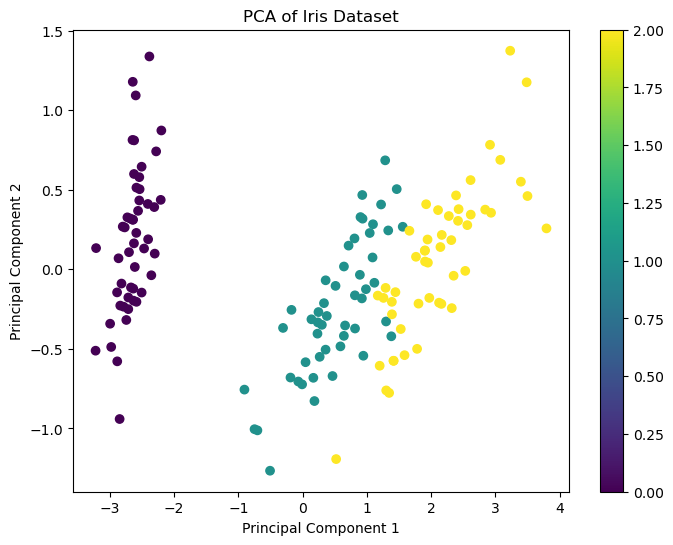

In [3]:
# Apply PCA to reduce from 4D to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()


In [4]:
# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Print the shapes of the split data
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (105, 2)
Test set shape: (45, 2)


In [5]:
# Train a Support Vector Classifier (SVC) on the reduced 2D data
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=iris.target_names)}")


Model Accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [6]:
# Example new flower measurements in 4D: [sepal length, sepal width, petal length, petal width]
new_flower = np.array([[5.9, 3.0, 5.1, 1.8]])

# Reduce the new flower's dimensions using the same PCA transformation
new_flower_reduced = pca.transform(new_flower)

# Predict the class of the new flower
predicted_class = svc_model.predict(new_flower_reduced)
predicted_species = iris.target_names[predicted_class][0]

print(f"The predicted species for the new flower is: {predicted_species}")


The predicted species for the new flower is: virginica
